## Importing librairies

In [82]:
# Importing librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer 
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## importing dataset

In [83]:
# ====== IMPORTING DATASET ======
customer = pd.read_csv(r"../data/customer_segmentation.csv")
print("Dataset Impoted ✅✅")

Dataset Impoted ✅✅


## Data types seprations

In [ ]:
# ====== SEPQRQTION OF DATA TYPES ======
num_col = customer.select_dtypes(include=['int64','float64']).columns.tolist()
cat_col = customer.select_dtypes(include=['object']).columns.tolist()

# ====== PIPELINE ======
# Categoricals columns
cat_transformers = Pipeline([
    ("imputer",SimpleImputer(strategy='constant', fill_value="Missing")),
    ("oneencoder",OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
])

# Numericals columns
num_transformers = Pipeline([
    ("impute", KNNImputer(n_neighbors=3)),
    ("scaler", StandardScaler())
])

# Preprocessing
preprocessors = ColumnTransformer(
    transformers=[
        ("cat", cat_transformers, cat_col),
        ('num', num_transformers,num_col)
    ]
)

# ====== PRINCIPAL COMPONENTS ANALYSIS ======
pipeline = Pipeline([
    ("preprocess", preprocessors),
    ("pca", PCA(n_components=10))
])

# ====== DATA TRANSFORMING ======
data_transformed = pipeline.fit_transform(customer)
print("PCA Passed ✅✅")

PCA Passed ✅✅


## Elbow Method

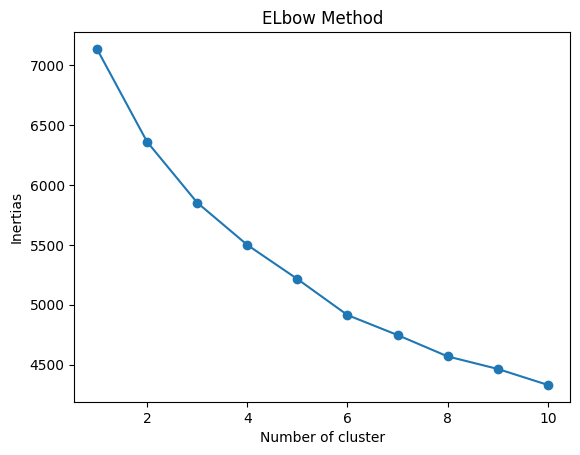

In [85]:
# ====== ELBOW METHOD ======
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_transformed)
    inertias.append(kmeans.inertia_)

# Visualization
plt.plot(range(1,11), inertias, marker='o')
plt.title("ELbow Method")
plt.xlabel('Number of cluster')
plt.ylabel("Inertias")
plt.show()

## Silhouette Coefficient Method

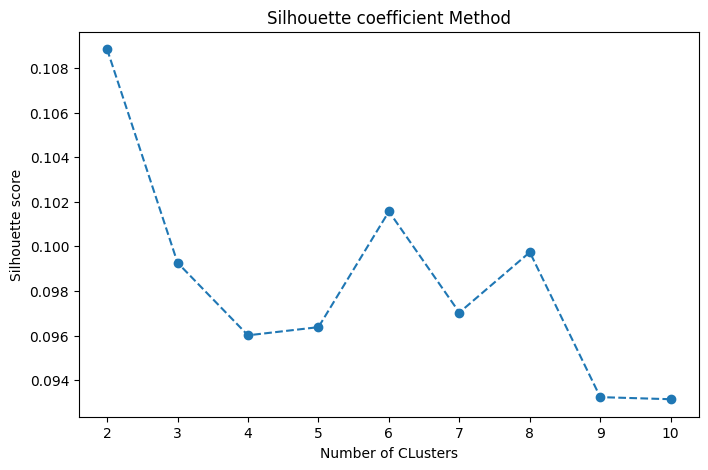

In [86]:
# ====== SILHOUETTE COEFFICIENT METHOD ======
silhouette_scores = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(data_transformed)
    score = silhouette_score(data_transformed, clusters)
    silhouette_scores.append(score)

# Visualization
plt.figure(figsize=(8, 5))
plt.plot(range(2,11), silhouette_scores, marker="o", linestyle="--")
plt.xlabel("Number of CLusters")
plt.ylabel("Silhouette score")
plt.title("Silhouette coefficient Method")
plt.show()

## Applying Kmeans

In [87]:
# ====== APPLYING KMEANS ======
optimal_k = 3
kmean = KMeans(n_clusters=3, random_state=42)
clusters = kmean.fit_predict(data_transformed)
customer["Clusters"] = clusters
print("KMeans Applied ✅✅")

KMeans Applied ✅✅


## Visualizing Centroids

In [88]:
# Centroids
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_transformed)
centroids =pca.transform(kmean.cluster_centers_)
print("PCA Applied for visualizing Centroids ✅✅")

PCA Applied for visualizing Centroids ✅✅


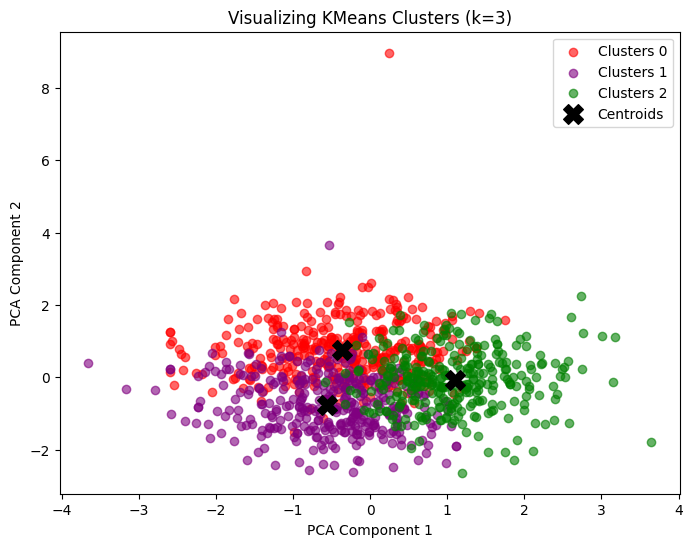

In [89]:
# Visualization
plt.figure(figsize=(8,6))
colors = ["red","purple","green"]

for i in range(optimal_k):
    plt.scatter(data_pca[clusters == i, 0], data_pca[clusters == i, 1],label = f"Clusters {i}", alpha=0.6, color =colors[i])

plt.scatter(centroids[:, 0], centroids[:,1], marker="X", s=200, c="black", label ="Centroids")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(f"Visualizing KMeans Clusters (k={optimal_k})")
plt.legend()
plt.show()

## Average analysis

In [ ]:
# ====== AVERAGE ANALYSIS ======
cluster_summary = customer.groupby("Clusters")[num_col].mean()

cluster_summary


,Age,Annual_Income,Spending_Score,Visit_Frequency,Average_Basket,Satisfaction_Score
Clusters,,,,,,
0,42.273775,55611.113314,51.008403,4.501416,141.687949,4.412088
1,39.413174,46258.376506,52.697885,4.217523,118.318762,1.839009
2,50.923611,52398.303887,45.510638,6.297203,192.400868,2.362989


## Most frequent category by cluster

In [94]:
cluster_proportions = customer.groupby("Clusters")["Used_Discount"].value_counts(normalize=True)
cluster_proportions

Clusters  Used_Discount
0         Non              0.710145
          Oui              0.289855
1         Non              0.638554
          Oui              0.361446
2         Non              0.711340
          Oui              0.288660
Name: proportion, dtype: float64

## Cluster Proportion by categories

In [95]:
cluster_proportions = customer.groupby("Clusters")["Preferred_Category"].value_counts(normalize=True)
cluster_proportions

Clusters  Preferred_Category
0         Electronics           0.224138
          Health                0.218391
          Leisure               0.206897
          Fashion               0.183908
          Home                  0.166667
1         Electronics           0.232836
          Health                0.220896
          Fashion               0.188060
          Home                  0.182090
          Leisure               0.176119
2         Home                  0.227273
          Leisure               0.223776
          Fashion               0.192308
          Electronics           0.188811
          Health                0.167832
Name: proportion, dtype: float64

In [93]:
# Catégorie la plus fréquente par cluster
for col in cat_col:
    mode_per_cluster = customer.groupby("Clusters")[col].agg(lambda x: x.mode()[0])
    print(f"\nCatégorie dominante de {col} par Cluster :\n{mode_per_cluster}")


Catégorie dominante de Used_Discount par Cluster :
Clusters
0    Non
1    Non
2    Non
Name: Used_Discount, dtype: object

Catégorie dominante de Preferred_Category par Cluster :
Clusters
0    Electronics
1    Electronics
2           Home
Name: Preferred_Category, dtype: object
